# Numpy

In [89]:
import numpy as np
import seaborn as sns # Only for correlation visualization (heatmap)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Linear equation 
Find x for Ax = b

In [43]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)
b = np.array([-5, 0, 10, -17])

In [44]:
a_inv = np.linalg.inv(A) # Ax=b -> x= b*A^-1
x1 = np.dot(a_inv,b) # first way of solution
np.set_printoptions(suppress=True)
print(x1)
x2 = np.linalg.solve(A,b) # second way
print(x2)

[ 5. -1.  0. -2.]
[ 5. -1.  0. -2.]


[link text](https://)**Tip:** have a look to np.set_printoptions

### 2. Cliping
Set all negatives values of array to zero

In [ ]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)

In [13]:
A = A.clip(min=0) # first way
A[A < 0] = 0 # second way

print(A)

[[1 2 3 4]
 [3 0 8 9]
 [5 1 0 7]
 [0 5 0 1]]


### 3. Normalization
Normalize vector x (rescale values between 0, 1)

In [27]:
x = np.array([-4, 2, -1, 5, -10])

In [29]:
normalized = np.interp(x, (x.min(), x.max()), (0, +1))
print(normalized)

[0.4 0.8 0.6 1.  0. ]


### 4. Standardize
Standardize image with shape (height, width, channels). \
Each channel should have zero mean and unit variance.

In [45]:
img = np.array([
     [[105, 121,  90], [109, 125,  94], [107, 125,  89], [106, 124, 86]],
     [[106, 123,  90], [107, 124,  91], [106, 125,  87], [108, 123, 81]],
     [[106, 123,  90], [107, 124,  91], [107, 126,  88], [107, 123, 85]],
     [[107, 125,  90], [106, 122,  89], [108, 126,  89], [103, 121, 83]]
])

In [50]:
r,g,b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
s_r,s_g,s_b = (r - np.mean(r))/np.std(r),(g - np.mean(g))/np.std(g), (b - np.mean(b))/np.std(b)
s_img = np.dstack([s_r, s_g, s_b])
print(s_img)

[[[-1.18245942 -1.80838886  0.53457486]
  [ 1.8446367   0.82199494  1.80171529]
  [ 0.33108864  0.82199494  0.21778976]
  [-0.42568539  0.16439899 -0.73256556]]

 [[-0.42568539 -0.49319696  0.53457486]
  [ 0.33108864  0.16439899  0.85135997]
  [-0.42568539  0.82199494 -0.41578045]
  [ 1.08786267 -0.49319696 -2.31649108]]

 [[-0.42568539 -0.49319696  0.53457486]
  [ 0.33108864  0.16439899  0.85135997]
  [ 0.33108864  1.47959089 -0.09899535]
  [ 0.33108864 -0.49319696 -1.04935066]]

 [[ 0.33108864  0.82199494  0.53457486]
  [-0.42568539 -1.15079291  0.21778976]
  [ 1.08786267  1.47959089  0.21778976]
  [-2.69600749 -1.80838886 -1.68292087]]]


### 5. Euclidian distance
Calculate distance matrix between two sets of pooints 

In [58]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4], [3, 2]])

In [67]:
np.linalg.norm(a[:, None, :] - b[None, :, :], axis=-1)

ValueError: ignored


# Pandas

In [82]:
import pandas as pd
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
df = pd.read_csv(url)


80.0


### Task 1
Find the name, age and sex of oldest passenger on Titanic

In [99]:
print(df.loc[df["Age"] == max(df["Age"]), ['Name', 'Sex', 'Age' ]])

                                     Name   Sex   Age
630  Barkworth, Mr. Algernon Henry Wilson  male  80.0


### Task 2
Show rows with passengers with age greater than 5 percantile and less than 95 percantile

In [100]:
df[(df["Age"].quantile(.05)< df["Age"]) & (df["Age"] < df["Age"].quantile(.95))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Task 3

Show correlation between features

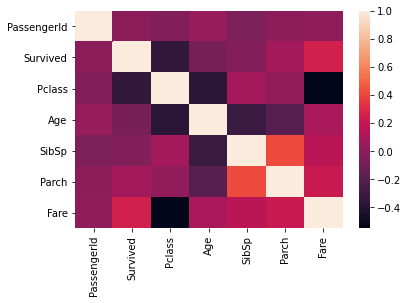

In [90]:
corr = df.corr()
sns.heatmap(corr)

### Task 4
Find average fare for survived and not survived passengers 

In [92]:
f1 = np.average(df['Fare'][df['Survived'] == 1]) # avg fare for survived passengers
f2 = np.average(df['Fare'][df['Survived'] == 0]) # avg fare for not survived passengers
print(f1)
print(f2)

48.39540760233918
22.117886885245902


### Task 5
Vizualize boxplot to compare distributions of survived and not survived passengers.

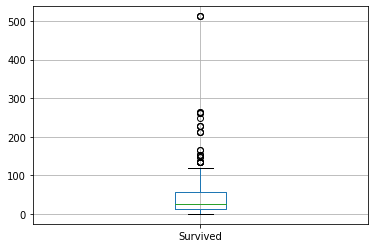

In [130]:
df_f1 = df.loc[df['Survived'] == 1,['Fare']]
df_f1 = df_f1.rename(columns={"Fare":"Survived"})
df_f1.boxplot(column="Survived")


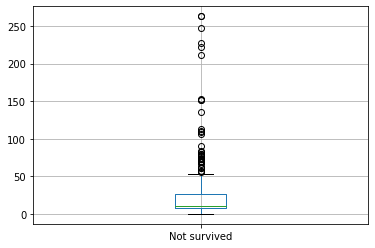

In [131]:
df_f2 = df.loc[df['Survived'] == 0,['Fare']]
df_f2 = df_f2.rename(columns={"Fare":"Not survived"})

boxplot = df_f2.boxplot(column="Not survived") 